In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import ascii
from astropy.table import Table, vstack
import pandas as pd
import imp
_, pathgrbz, _ = imp.find_module("pyGRBz")
path = os.getcwd()

/tmp/ipykernel_1069138/3343362210.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


# Fit only one SED

In [4]:
from pyGRBz.pyGRBz import GRB_photoZ

In [5]:
# Load module
photoz = GRB_photoZ(
    output_dir='/results/sed/',
    #output_dir='/home/nrakotondrainibe/Bureau/grb_git/codes____/photoz_module/SED',
    thres_err=0.02, # if flux_err/flux < thres_err then set flux_err = thres_err*flux
    wvl_step=50, # angstroms
    wvl_step_X=10 # angstroms
)

In [6]:
# Load the GRB SED stored in data/sed/
grb_list = ['GRB050904','GRB080825B']
photoz.load_data(data_dir='/data/sed/',data_name=grb_list)


Observations:
    Name    time_since_burst band  flux flux_err  zp flux_unit detection telescope ABcorr
---------- ---------------- ---- ----- -------- --- --------- --------- --------- ------
 GRB050904            1.155   Ks 19.26     0.07   -        AB         1     isaac     --
 GRB050904            1.155    H 19.74     0.07   -        AB         1     isaac     --
 GRB050904            1.155    J 20.14     0.06   -        AB         1     isaac     --
 GRB050904            1.155    z 21.03     0.22   -        AB         1     fors2     --
 GRB050904            1.155    I 22.27     0.22   -        AB         1     cafos     --
 GRB050904            1.155    I  24.2      0.2   -        AB         1     fors2     --
 GRB050904            1.155    R 24.29     0.05   -        AB         0     cafos     --
 GRB050904            1.155    V 24.23     0.05   -        AB         0     laica     --
GRB080825B          25920.0    g 22.45     0.07   -        AB         1     grond  -99.0
GRB08

In [7]:
# Format data in order to apply galactic estinction and calculates the flux in Jansky to each observations
photoz.formatting()


Reddening along the line of sight ofGRB080825B: E(B-V) = 0.214

Galactic extinction in band grond g: 0.833 AB mag
Galactic extinction in band grond r: 0.578 AB mag
Galactic extinction in band grond i: 0.431 AB mag
Galactic extinction in band grond z: 0.321 AB mag
Galactic extinction in band grond J: 0.191 AB mag
Galactic extinction in band grond H: 0.120 AB mag
Galactic extinction in band grond K: 0.077 AB mag

SEDS formatted:
    Name    time_since_burst band  flux flux_err ...         sys_response               ext_mag           flux_corr         flux_corr_err   
                                                ...                                                       microJy             microJy      
---------- ---------------- ---- ----- -------- ... ---------------------------- ------------------- ------------------ -------------------
 GRB050904            1.155    V 24.23     0.05 ...                   0.0 .. 0.0                 0.0 0.7379042301291044 0.18434138332737574
 GRB050

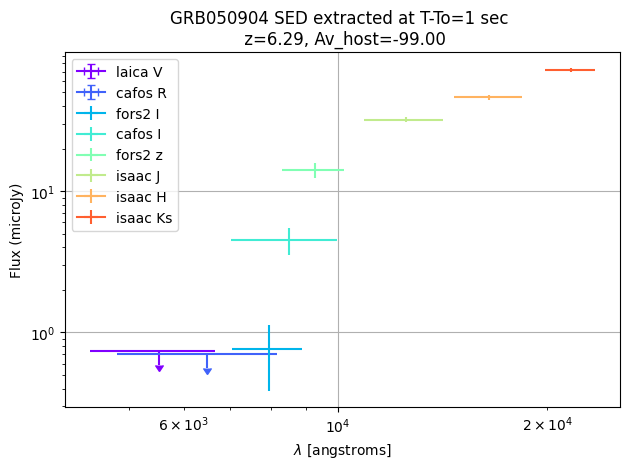

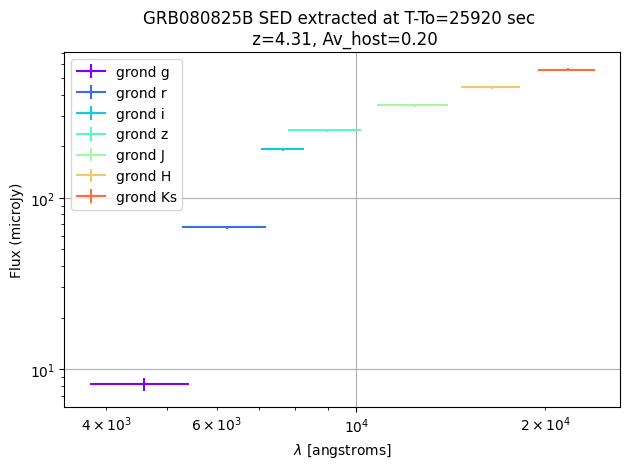


SEDS:
    Name    time_since_burst band  flux flux_err flux_unit
---------- ---------------- ---- ----- -------- ---------
 GRB050904            1.155    V 24.23     0.05        AB
 GRB050904            1.155    R 24.29     0.05        AB
 GRB050904            1.155    I  24.2      0.2        AB
 GRB050904            1.155    I 22.27     0.22        AB
 GRB050904            1.155    z 21.03     0.22        AB
 GRB050904            1.155    J 20.14     0.06        AB
 GRB050904            1.155    H 19.74     0.07        AB
 GRB050904            1.155   Ks 19.26     0.07        AB
GRB080825B          25920.0    g 22.45     0.07        AB
GRB080825B          25920.0    r 19.91     0.04        AB
GRB080825B          25920.0    i 18.62     0.04        AB
GRB080825B          25920.0    z 18.24     0.04        AB
GRB080825B          25920.0    J 17.74     0.04        AB
GRB080825B          25920.0    H 17.41     0.05        AB
GRB080825B          25920.0   Ks 17.11     0.05        AB



In [8]:
# Extract the SED at a given time.
# First the data are fitted either with a single power law (SPL) or a broken power law (BPL)
# Secondly the time at which to extract the SED can be either 'fixed' (needs to give through time_SED in seconds) or 
# computed to be the time at which the flux is maximum in the reddest band ('ReddestBand')

# In case the input data is already a SED. THis function has to run in order to have the right
# formatting for the follwing computations

photoz.extract_sed(model='SPL',method='ReddestBand')
#photoz.extract_sed(model='BPL',method='fixed',time_SED=70)

In [9]:
# Create flat priors
priors=dict(z=[0,11],Av=[0,10],beta=[0,3],norm=[0.5,20])#,NHx=[0,10])



Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 84.34it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [53.71702882 45.17006565 53.52986611 57.91906268]



Autocorrelation time: 53.72 steps


Mean acceptance fraction: 0.049

Best fit:
z: 6.457  Av: 0.093  beta: 1.233  Norm: 1.345     chi2: 5.869

Mean Proba: 3.68e-03
Sum Proba: 7.37e+01

68% - 1 sigma:
z: 6.227 +0.268 -5.244
Av: 0.443 +2.779 -0.210
Beta: 0.459 +0.497 -0.357
norm: 3.870 +3.793 -1.805

95% - 2 sigma:
z: 6.227 +0.862 -6.145
Av: 0.443 +8.051 -0.381
Beta: 0.459 +1.221 -0.442
norm: 3.870 +9.220 -2.717

99% - 3 sigma:
z: 6.227 +1.758 -6.207
Av: 0.443 +8.488 -0.408
Beta: 0.459 +2.219 -0.456
norm: 3.870 +15.531 -3.024


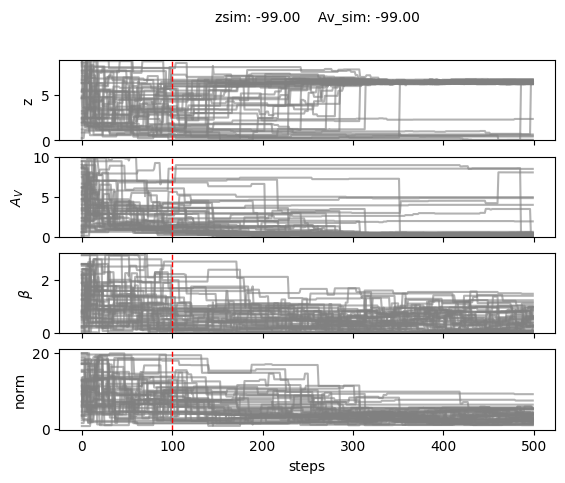

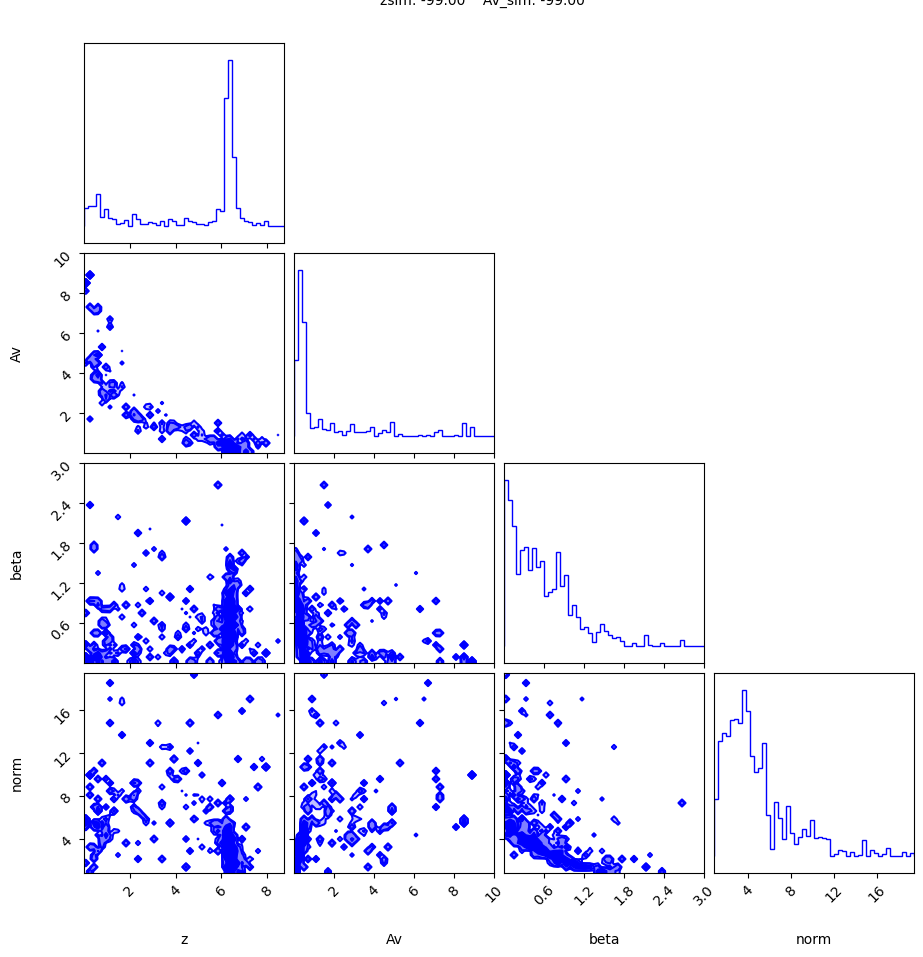


For best SED plot:
- Median values PDF: 6.227 0.443 0.459 3.870
- Best fit: 6.457 0.093 1.233 1.345


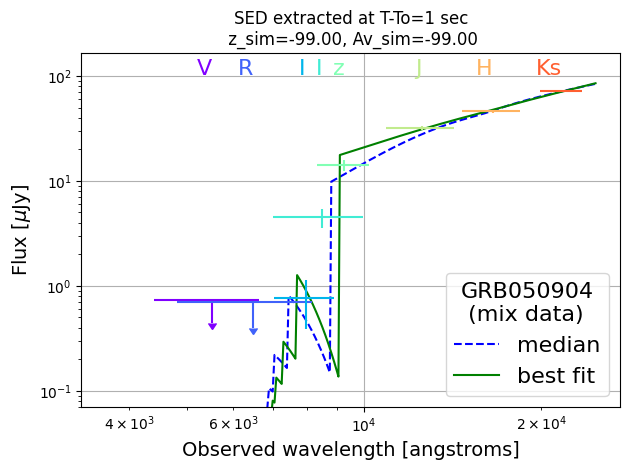



Fit 2/2 	 Object: GRB080825B 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.69it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [50.54782387 52.59543407 57.88031227 58.74521843]



Autocorrelation time: 50.55 steps


Mean acceptance fraction: 0.093

Best fit:
z: 4.556  Av: 0.209  beta: 0.366  Norm: 1.302     chi2: 8.905

Mean Proba: 7.21e-04
Sum Proba: 1.44e+01

68% - 1 sigma:
z: 4.307 +0.266 -3.759
Av: 0.291 +1.706 -0.111
Beta: 0.365 +0.306 -0.237
norm: 1.410 +0.993 -0.146

95% - 2 sigma:
z: 4.307 +0.331 -4.276
Av: 0.291 +6.341 -0.198
Beta: 0.365 +0.938 -0.352
norm: 1.410 +4.990 -0.292

99% - 3 sigma:
z: 4.307 +0.482 -4.304
Av: 0.291 +9.334 -0.260
Beta: 0.365 +2.299 -0.364
norm: 1.410 +17.356 -0.584


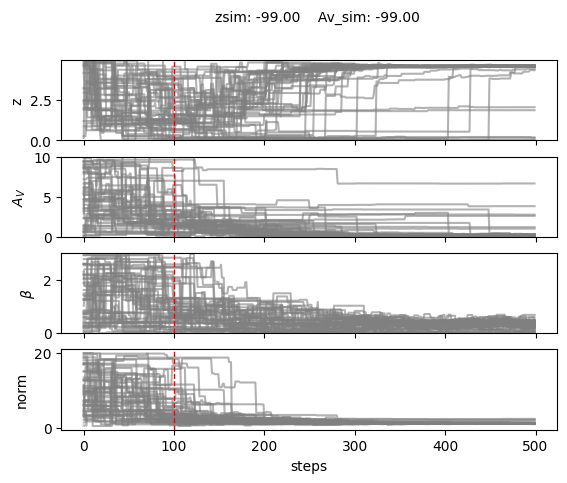

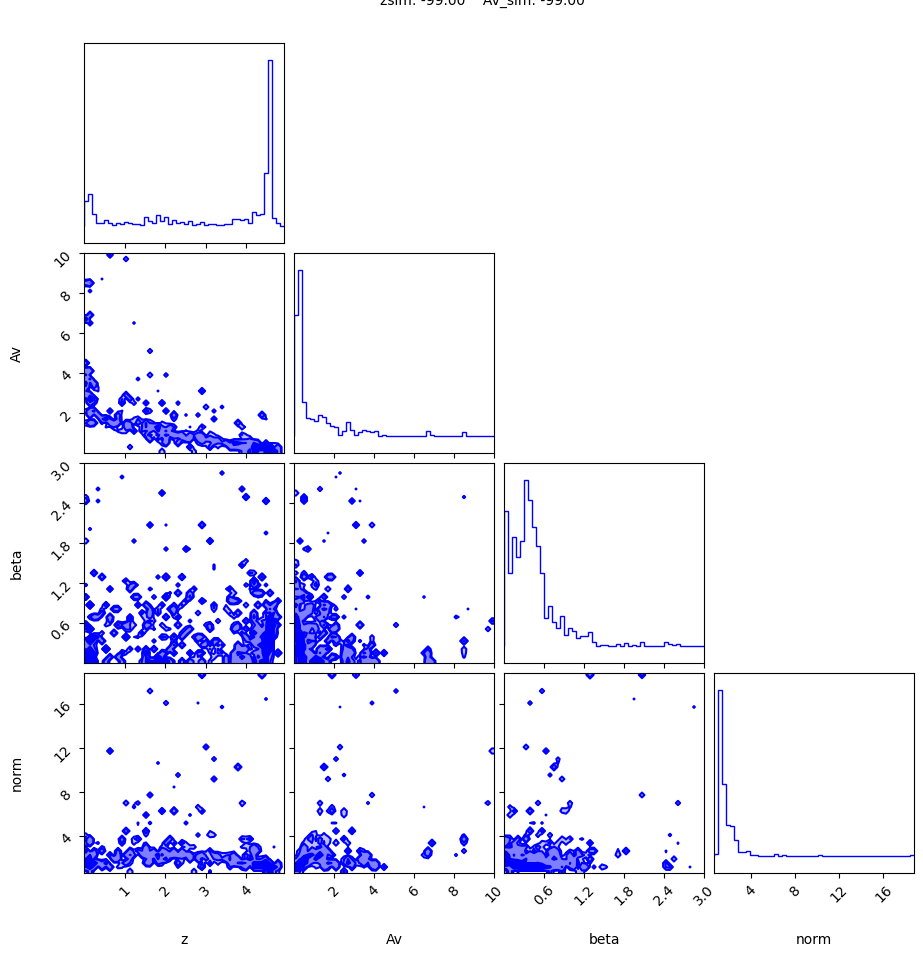


For best SED plot:
- Median values PDF: 4.307 0.291 0.365 1.410
- Best fit: 4.556 0.209 0.366 1.302


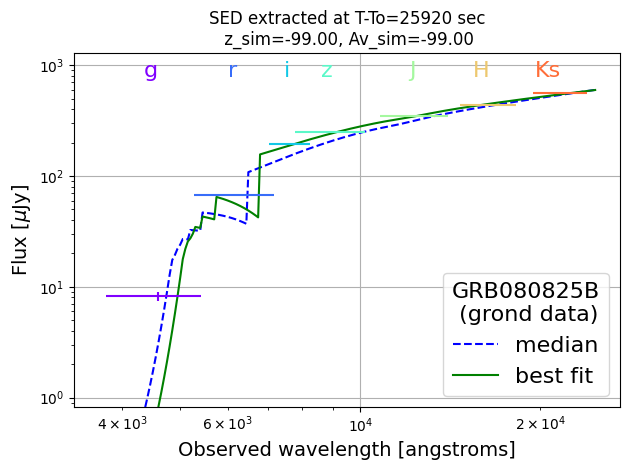


List of GRB not detected: []

None


Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 84.55it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [54.96494076 49.75449607 48.16584799 55.21956329]



Autocorrelation time: 54.96 steps


Mean acceptance fraction: 0.024

Best fit:
z: 6.279  Av: 0.321  beta: 1.005  Norm: 2.365     chi2: 8.707

Mean Proba: 5.53e-05
Sum Proba: 1.11e+00

68% - 1 sigma:
z: 3.162 +3.213 -3.004
Av: 1.684 +3.559 -1.083
Beta: 0.460 +0.617 -0.323
norm: 5.377 +7.452 -2.611

95% - 2 sigma:
z: 3.162 +4.938 -3.146
Av: 1.684 +5.438 -1.536
Beta: 0.460 +1.748 -0.446
norm: 5.377 +13.026 -4.377

99% - 3 sigma:
z: 3.162 +5.528 -3.159
Av: 1.684 +7.505 -1.649
Beta: 0.460 +2.387 -0.459
norm: 5.377 +14.366 -4.681


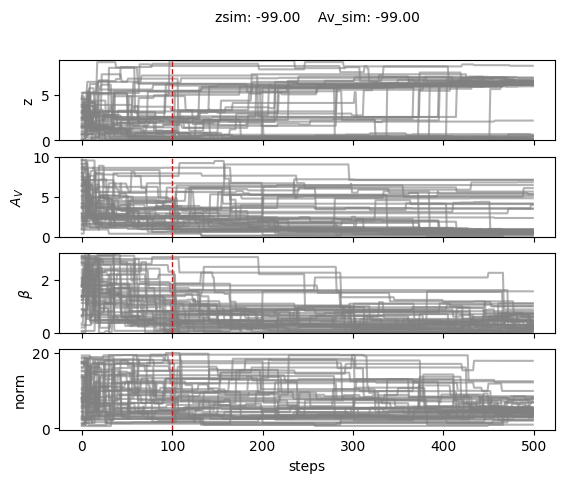

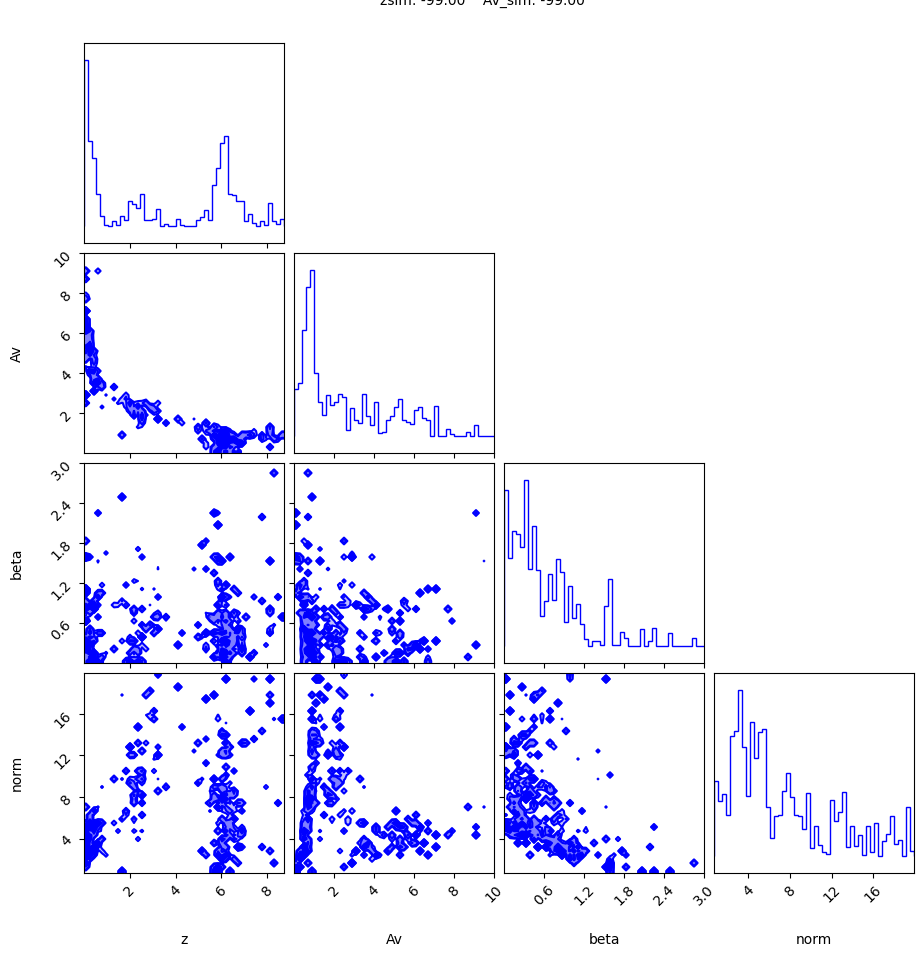


For best SED plot:
- Median values PDF: 3.162 1.684 0.460 5.377
- Best fit: 6.279 0.321 1.005 2.365


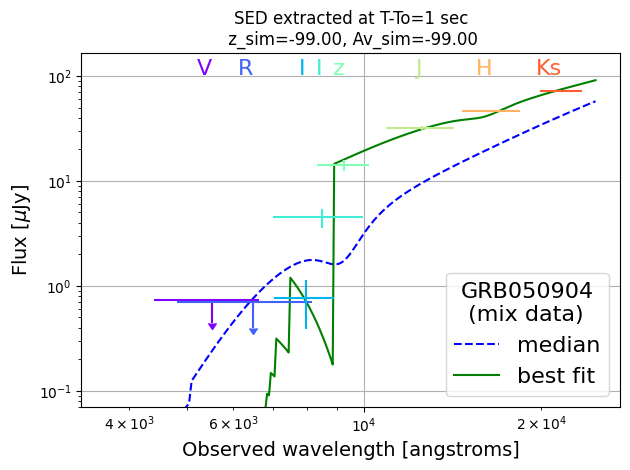



Fit 2/2 	 Object: GRB080825B 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 89.82it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [57.05010756 41.38013896 48.12478766 50.86102463]



Autocorrelation time: 57.05 steps


Mean acceptance fraction: 0.143

Best fit:
z: 4.592  Av: 0.221  beta: 0.552  Norm: 1.376     chi2: 27.061

Mean Proba: 1.42e-07
Sum Proba: 2.83e-03

68% - 1 sigma:
z: 4.561 +0.043 -2.882
Av: 0.292 +0.563 -0.101
Beta: 0.460 +0.220 -0.193
norm: 1.489 +0.310 -0.160

95% - 2 sigma:
z: 4.561 +0.087 -4.416
Av: 0.292 +2.010 -0.191
Beta: 0.460 +0.676 -0.427
norm: 1.489 +1.363 -0.305

99% - 3 sigma:
z: 4.561 +0.335 -4.518
Av: 0.292 +8.077 -0.287
Beta: 0.460 +1.530 -0.458
norm: 1.489 +4.010 -0.547


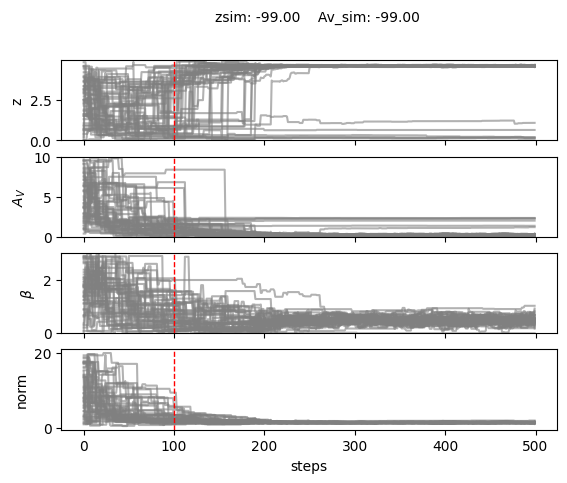

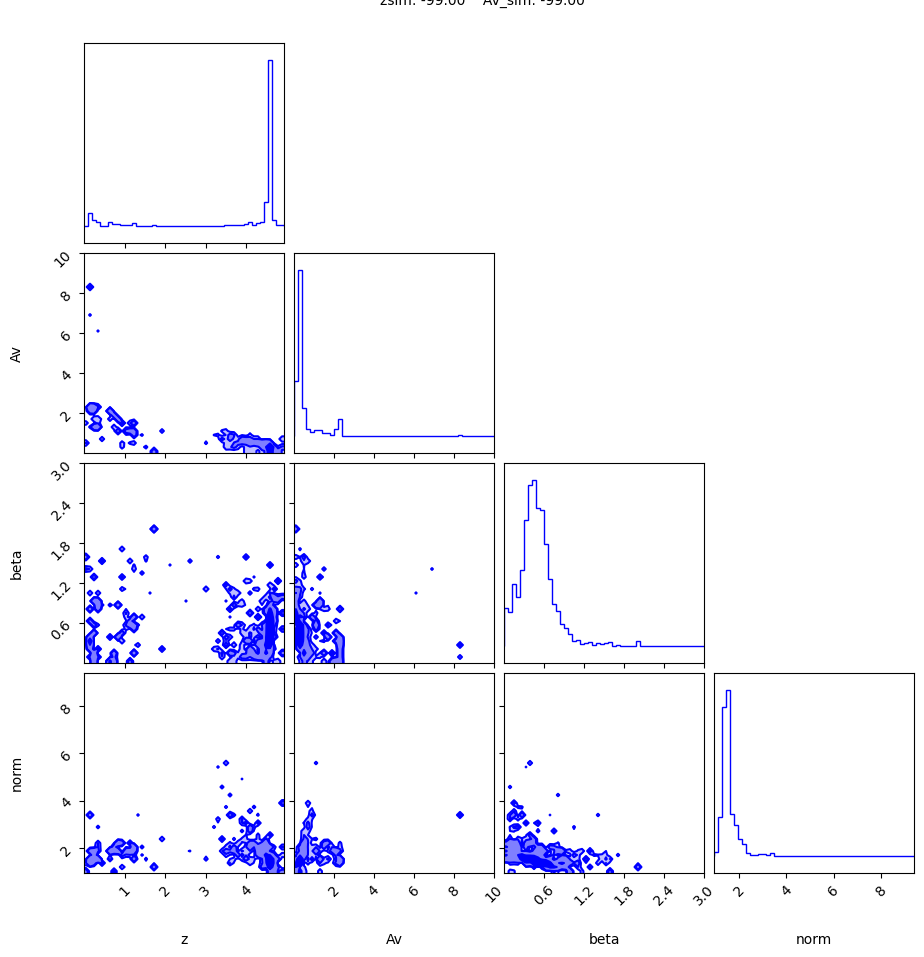


For best SED plot:
- Median values PDF: 4.561 0.292 0.460 1.489
- Best fit: 4.592 0.221 0.552 1.376


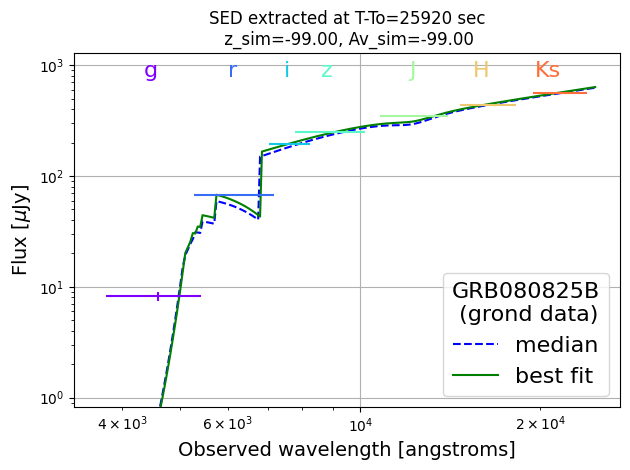


List of GRB not detected: []

None


Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 84.38it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [54.71006302 51.39080181 58.38316081 58.03421769]



Autocorrelation time: 54.71 steps


Mean acceptance fraction: 0.036

Best fit:
z: 6.587  Av: 0.036  beta: 1.479  Norm: 1.063     chi2: 4.790

Mean Proba: 1.93e-03
Sum Proba: 3.87e+01

68% - 1 sigma:
z: 6.208 +0.609 -6.014
Av: 0.971 +4.553 -0.787
Beta: 0.831 +0.517 -0.636
norm: 4.080 +3.834 -2.410

95% - 2 sigma:
z: 6.208 +1.563 -6.158
Av: 0.971 +7.128 -0.912
Beta: 0.831 +0.968 -0.809
norm: 4.080 +11.218 -2.955

99% - 3 sigma:
z: 6.208 +1.797 -6.189
Av: 0.971 +8.305 -0.969
Beta: 0.831 +1.716 -0.828
norm: 4.080 +15.231 -3.161


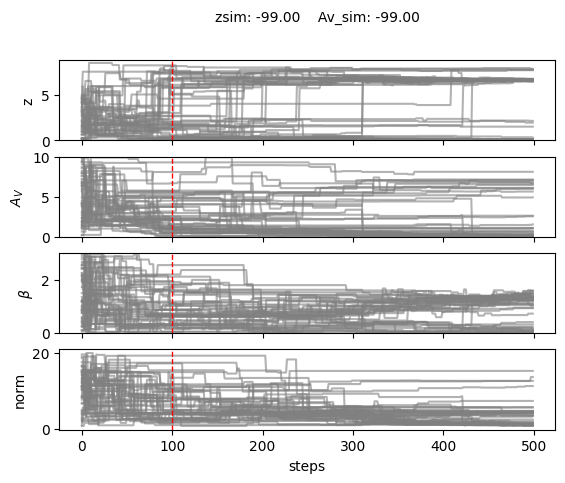

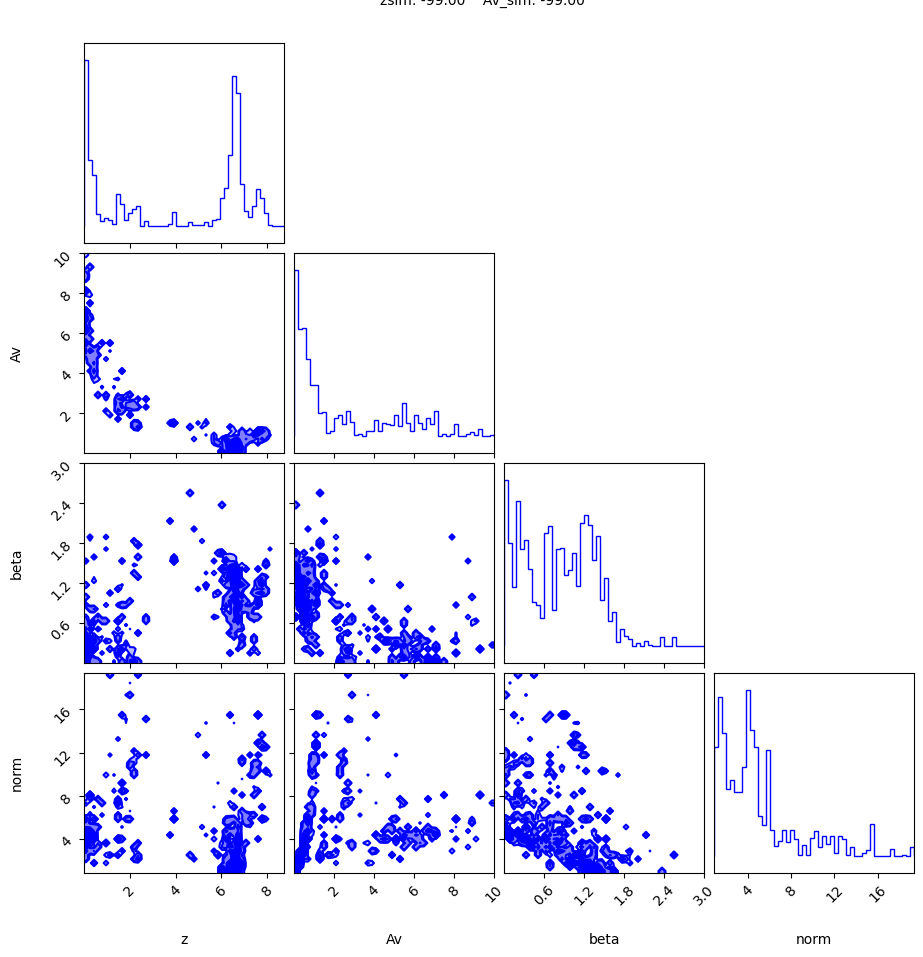


For best SED plot:
- Median values PDF: 6.208 0.971 0.831 4.080
- Best fit: 6.587 0.036 1.479 1.063


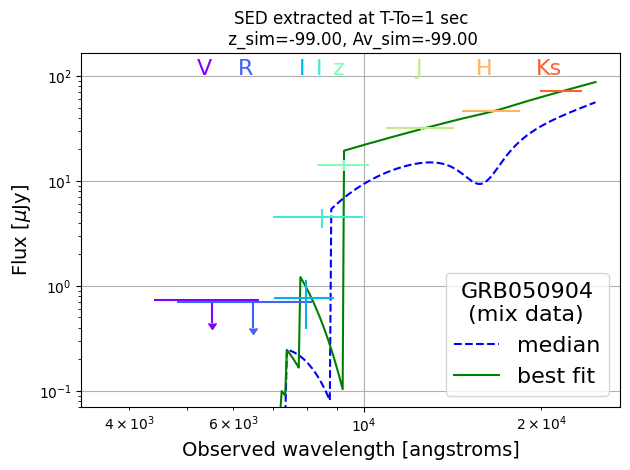



Fit 2/2 	 Object: GRB080825B 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.52it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [56.14438902 42.27524025 56.3491622  58.94999134]



Autocorrelation time: 56.14 steps


Mean acceptance fraction: 0.118

Best fit:
z: 4.635  Av: 0.001  beta: 1.031  Norm: 1.048     chi2: 38.142

Mean Proba: 2.91e-10
Sum Proba: 5.83e-06

68% - 1 sigma:
z: 4.635 +0.039 -1.823
Av: 0.063 +1.498 -0.056
Beta: 0.952 +0.071 -0.682
norm: 1.133 +1.311 -0.087

95% - 2 sigma:
z: 4.635 +0.146 -4.630
Av: 0.063 +6.184 -0.062
Beta: 0.952 +0.289 -0.950
norm: 1.133 +10.097 -0.117

99% - 3 sigma:
z: 4.635 +0.292 -4.635
Av: 0.063 +8.334 -0.063
Beta: 0.952 +1.245 -0.952
norm: 1.133 +17.238 -0.400


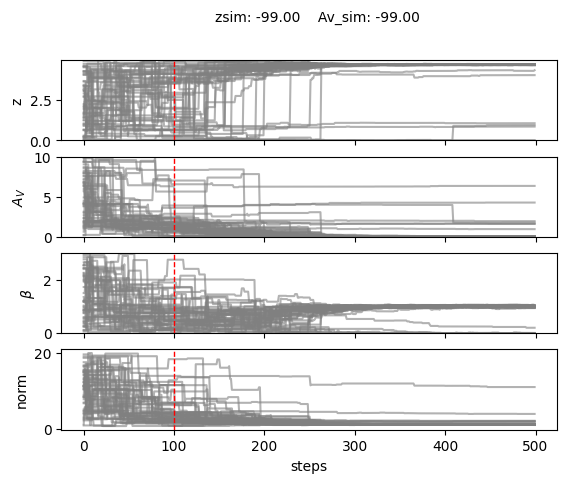

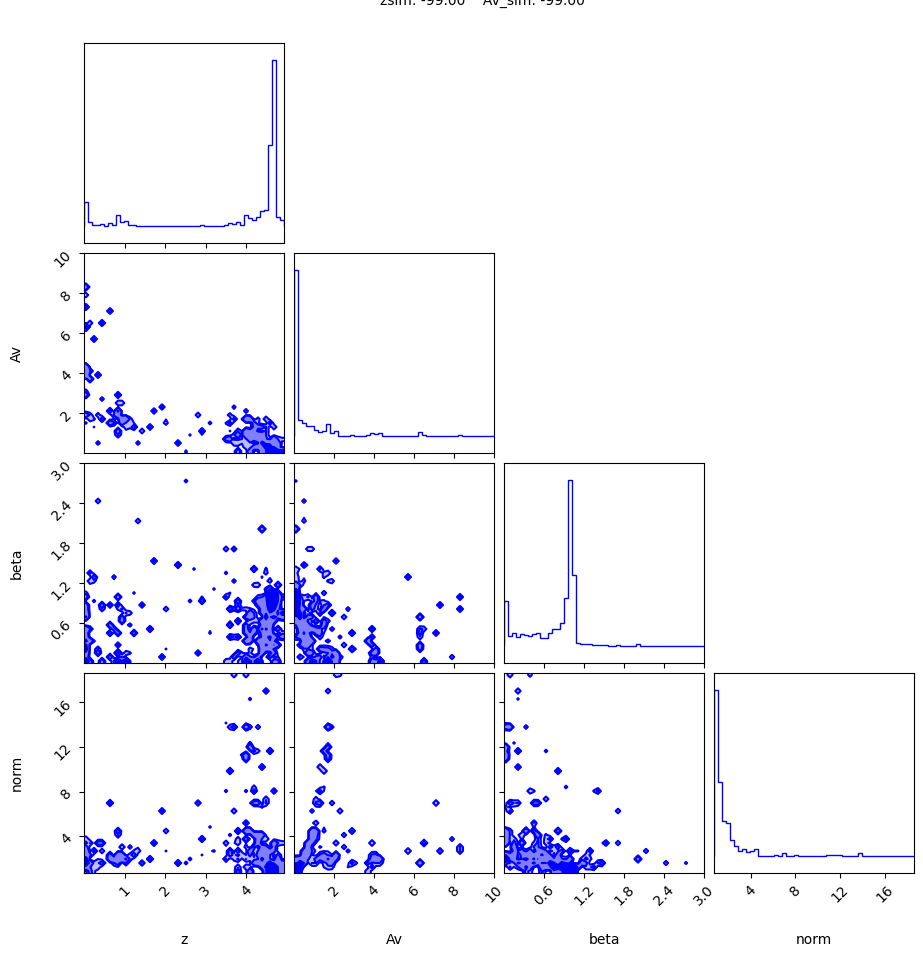


For best SED plot:
- Median values PDF: 4.635 0.063 0.952 1.133
- Best fit: 4.635 0.001 1.031 1.048


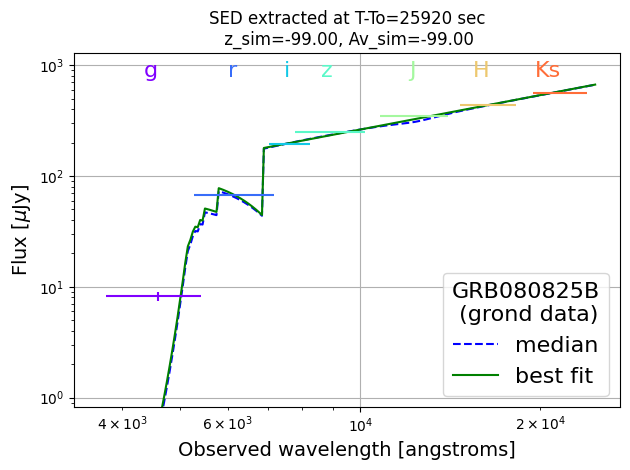


List of GRB not detected: []

None


Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 92.96it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [        nan         nan 48.62085251]



Autocorrelation time: nan steps


Mean acceptance fraction: 0.290

Best fit:
z: 6.539  beta: 1.506  Norm: 0.979     chi2: 5.080

Mean Proba: 2.62e-02
Sum Proba: 5.09e+02

68% - 1 sigma:
z: 6.565 +0.104 -0.106
Beta: 1.497 +0.101 -0.121
norm: 0.983 +0.046 -0.038

95% - 2 sigma:
z: 6.565 +0.973 -2.994
Beta: 1.497 +0.228 -1.288
norm: 0.983 +1.005 -0.090

99% - 3 sigma:
z: 6.565 +2.123 -6.157
Beta: 1.497 +0.906 -1.497
norm: 0.983 +14.646 -0.236


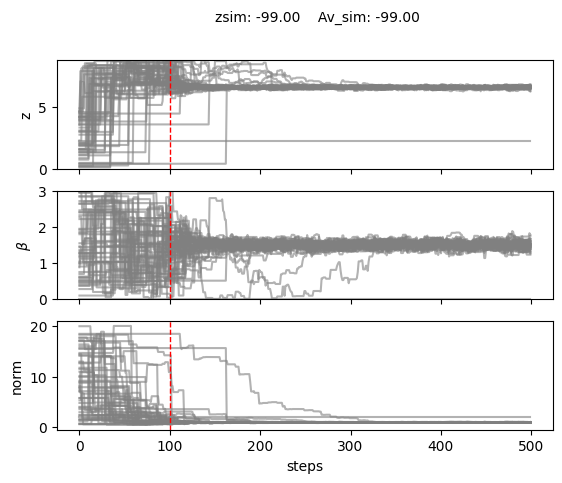

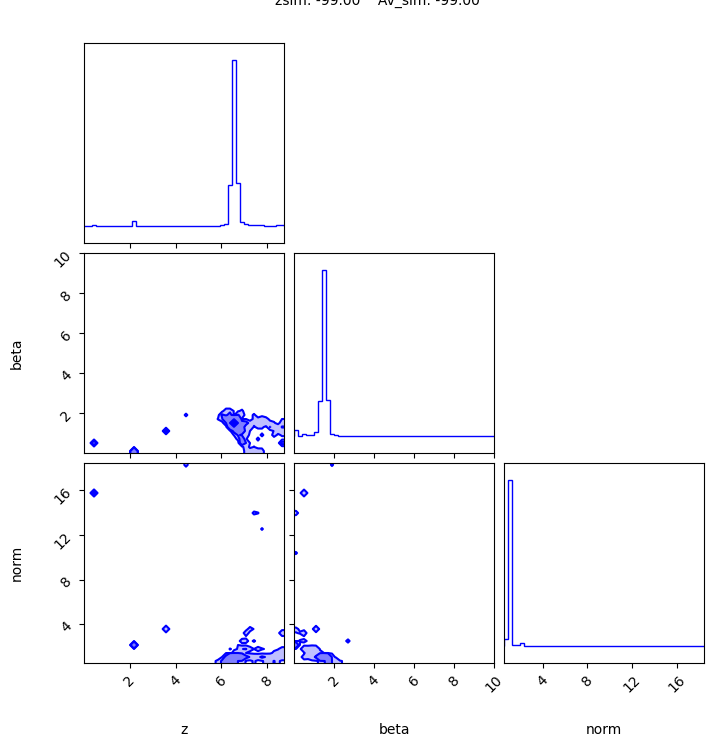


For best SED plot:
- Median values PDF: 6.565 0.000 1.497 0.983
- Best fit: 6.539 0.000 1.506 0.979


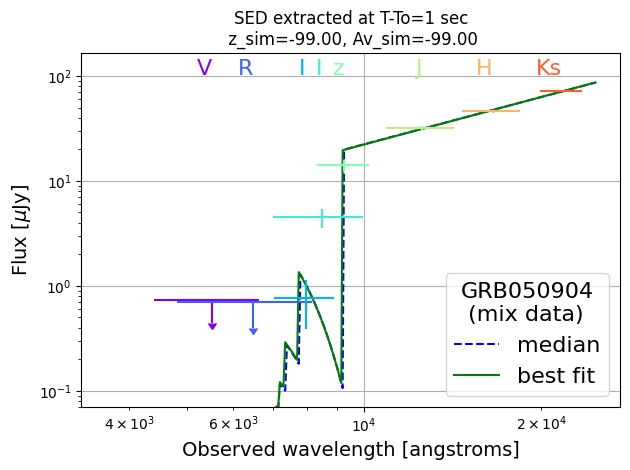



Fit 2/2 	 Object: GRB080825B 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 103.44it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [43.59364206 47.58667925 28.32272404]



Autocorrelation time: 43.59 steps


Mean acceptance fraction: 0.268

Best fit:
z: 4.633  beta: 1.027  Norm: 1.041     chi2: 37.608

Mean Proba: 1.43e-09
Sum Proba: 2.86e-05

68% - 1 sigma:
z: 4.649 +0.029 -0.015
Beta: 1.021 +0.029 -0.030
norm: 1.038 +0.021 -0.018

95% - 2 sigma:
z: 4.649 +0.043 -1.946
Beta: 1.021 +1.043 -0.059
norm: 1.038 +0.313 -0.039

99% - 3 sigma:
z: 4.649 +0.152 -4.618
Beta: 1.021 +1.696 -0.158
norm: 1.038 +5.990 -0.157


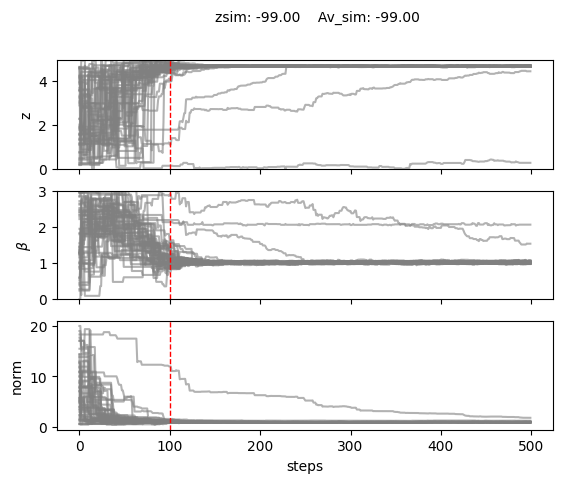

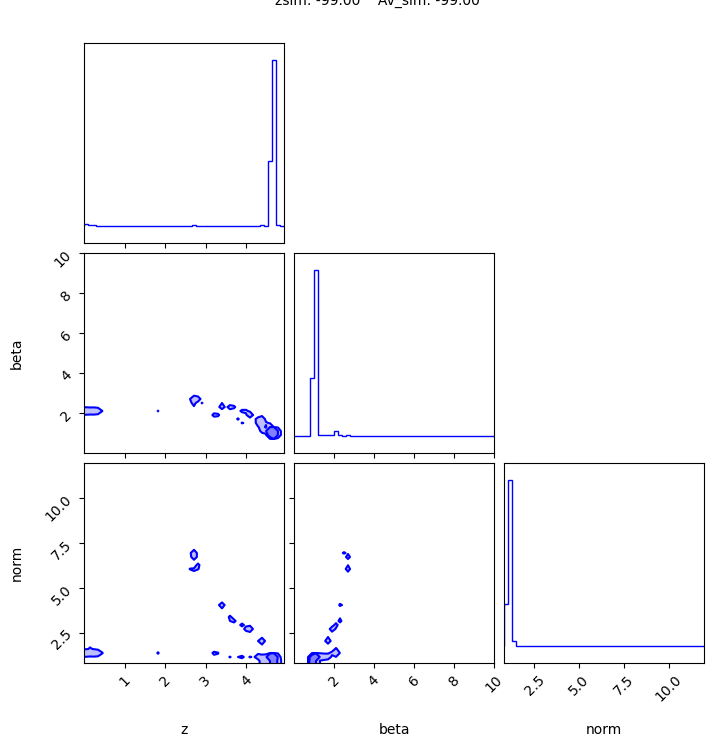


For best SED plot:
- Median values PDF: 4.649 0.000 1.021 1.038
- Best fit: 4.633 0.000 1.027 1.041


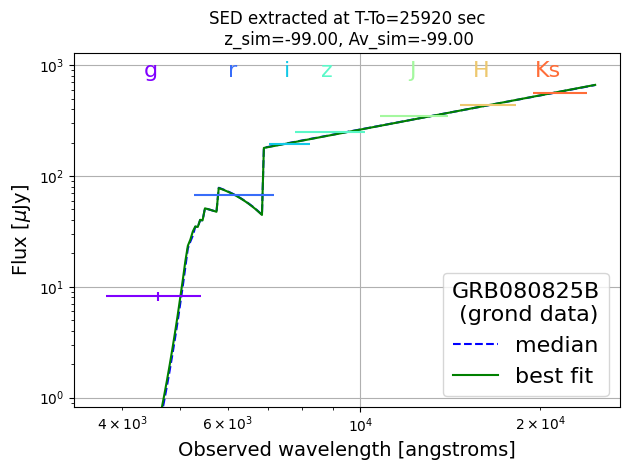


List of GRB not detected: []

None


Fit 1/2 	 Object: GRB050904 

Bluest band detection: fors2/I with eff_wvl=7960 and bandwidth=1850 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 8.74.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 79.66it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [48.55419227 43.49157899 47.01041894 54.17501935]



Autocorrelation time: 48.55 steps


Mean acceptance fraction: 0.056

Best fit:
z: 6.163  Av: 0.423  beta: 1.292  Norm: 2.367     chi2: 6.558

Mean Proba: 1.23e-03
Sum Proba: 2.47e+01

68% - 1 sigma:
z: 5.881 +0.235 -5.006
Av: 1.102 +2.285 -0.398
Beta: 0.930 +0.280 -0.372
norm: 6.751 +6.375 -3.233

95% - 2 sigma:
z: 5.881 +0.927 -5.760
Av: 1.102 +6.246 -0.599
Beta: 0.930 +1.165 -0.825
norm: 6.751 +11.680 -4.962

99% - 3 sigma:
z: 5.881 +1.863 -5.849
Av: 1.102 +8.816 -0.804
Beta: 0.930 +1.966 -0.917
norm: 6.751 +13.181 -5.590


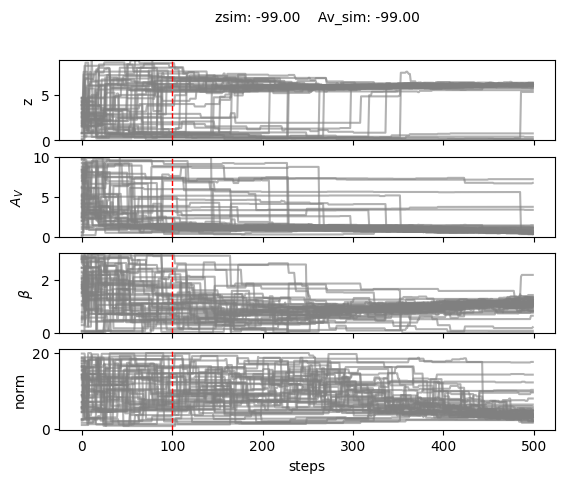

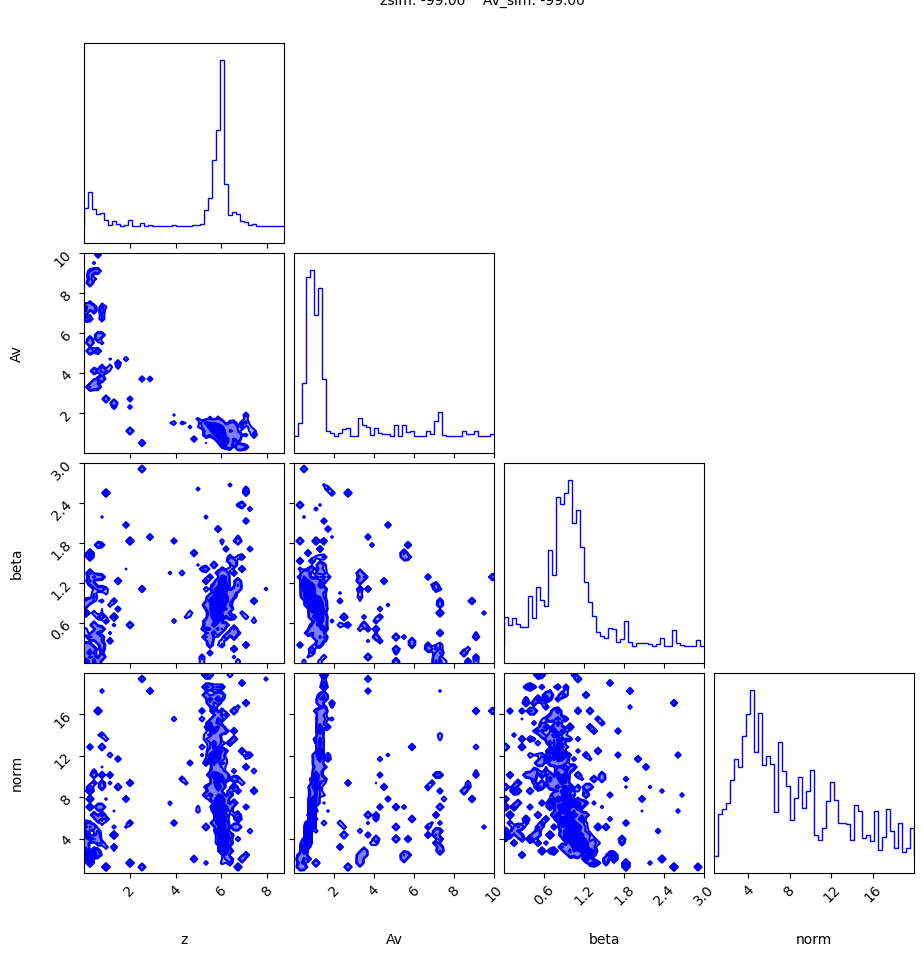


For best SED plot:
- Median values PDF: 5.881 1.102 0.930 6.751
- Best fit: 6.163 0.423 1.292 2.367


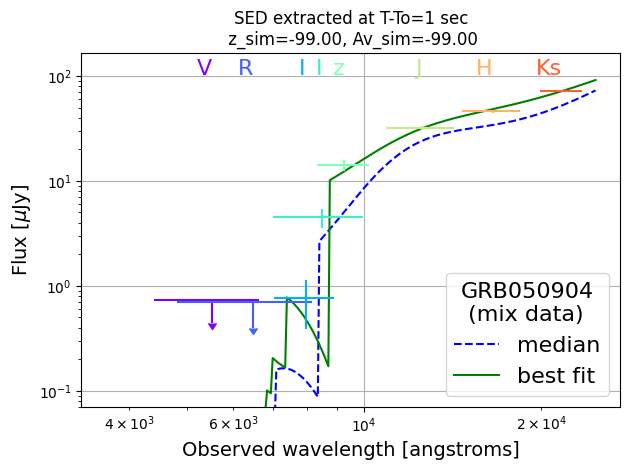



Fit 2/2 	 Object: GRB080825B 

Bluest band detection: grond/g with eff_wvl=4587 and bandwidth=1650 (Angstroms).

Assuming no flux can be observed below Lyman break at 912 Angstroms
--> maximum allowed redshift is 4.93.

This value is used to constrain the redshift parameter space in the analysis below.
z_lit: -99.00   Av_lit: -99.00
Running production


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 93.51it/s]
The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [56.73833844 39.14029394 56.53988457 56.85375049]



Autocorrelation time: 56.74 steps


Mean acceptance fraction: 0.184

Best fit:
z: 4.509  Av: 0.235  beta: 0.694  Norm: 1.416     chi2: 10.871

Mean Proba: 4.68e-04
Sum Proba: 9.36e+00

68% - 1 sigma:
z: 4.506 +0.047 -0.534
Av: 0.262 +0.562 -0.060
Beta: 0.679 +0.089 -0.245
norm: 1.476 +1.119 -0.117

95% - 2 sigma:
z: 4.506 +0.087 -4.357
Av: 0.262 +3.642 -0.123
Beta: 0.679 +0.927 -0.588
norm: 1.476 +4.189 -0.215

99% - 3 sigma:
z: 4.506 +0.386 -4.505
Av: 0.262 +7.366 -0.239
Beta: 0.679 +1.973 -0.673
norm: 1.476 +12.231 -0.434


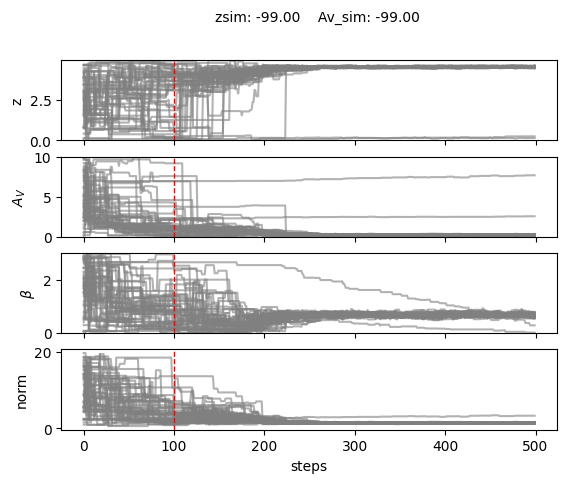

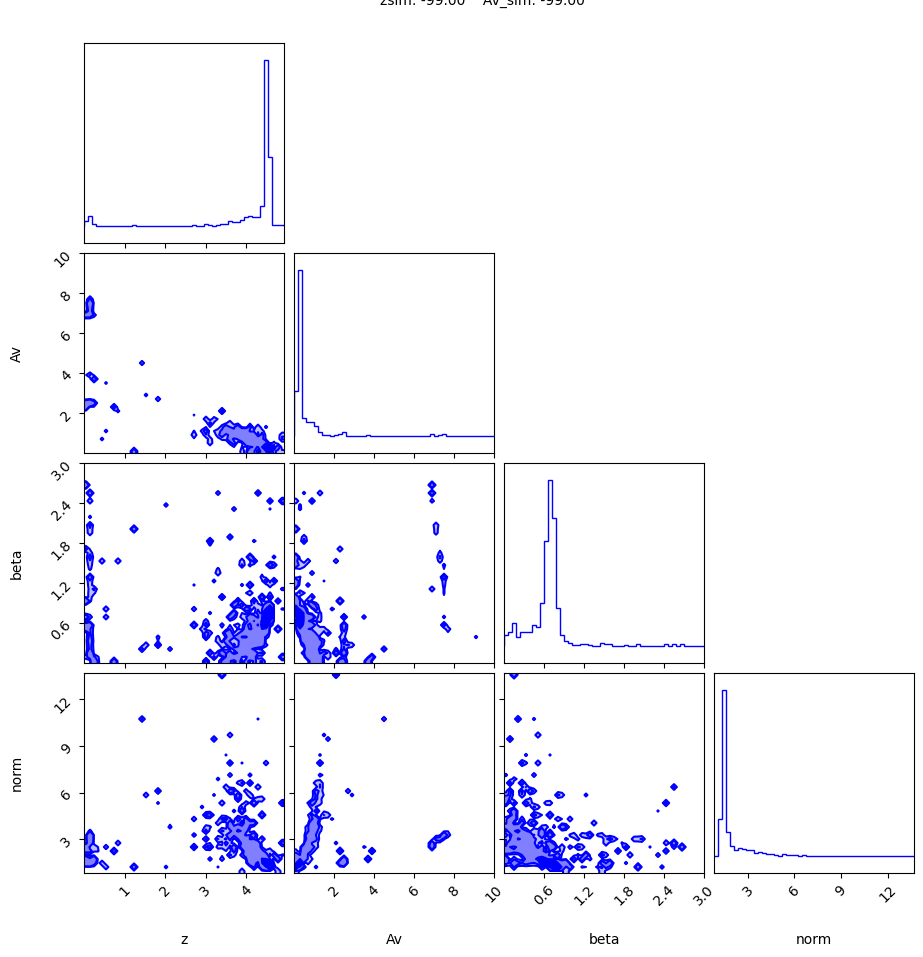


For best SED plot:
- Median values PDF: 4.506 0.262 0.679 1.476
- Best fit: 4.509 0.235 0.694 1.416


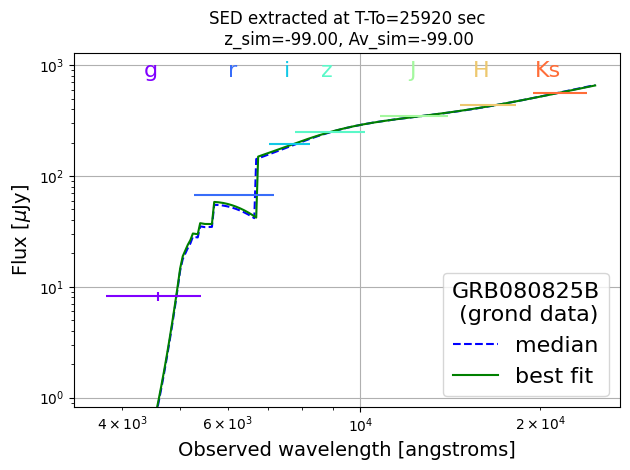


List of GRB not detected: []

None


In [10]:
# Run the MCMC algorithm.
# Select the extinction law to used: 'smc', 'lmc', 'mw', 'nodust'
# Nthreads: number of threads to use in case of parallelisation
# nwalkers: number of walkers
# Nsteps1: number of steps for the first burn-in phase, values returning the best chi2
# are used as initial values for production run. Set to 0 if you do not want this 
# Nsteps2: number of steps for the production run
# Select to add dust, gas in host and our galaxy
# Select IGM transmission method: 'Madau' or 'Meiksin'

ext_laws = ['smc', 'lmc', 'mw', 'nodust','sne']
for law in ext_laws:
    photoz.fit(
        ext_law=law,
        Nthreads=6,
        nwalkers=50,
#        Nsteps1=500,
#        Nsteps2=1000,
        Nsteps1=0,
        Nsteps2=500,
        nburn=100,
#        nburn=300,
        Host_dust=True,
        Host_gas=False,
        igm_att='Meiksin',
        clean_data=False,
        priors=priors,
        adapt_z=True
        )

# Statistic comparison

In [14]:
from pyGRBz.estimation import stats

In [19]:
path

'/home/nrakotondrainibe/Bureau/grb_git/codes____/photoz/zmodule'

In [17]:
grb_list = ['GRB050904','GRB080825B']

In [26]:
for grb in grb_list:
    out = (path+"/results/sed/%s/"%grb)
    print(grb)
    stats(out,ext_laws=ext_laws,lim_bic = 2)

GRB050904
Best fit is given using the  ['nodust']  extinction law
GRB not resolved with BIC threshold of  2
GRB080825B
Best fit is given using the  ['smc']  extinction law
GRB not resolved with BIC threshold of  2
